In [51]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [50]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [49]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [48]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()
inspector = inspect(engine)

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine,reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station



In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)
inspector.get_table_names()

measure_cols = inspector.get_columns('measurement')
for column in measure_cols:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [15]:
session = Session(engine)
inspector = inspect(engine)
inspector.get_table_names()

station_cols = inspector.get_columns('station')
for column in station_cols:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [16]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [17]:
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"the most recent date in Measurement data was :{recent_date}")


the most recent date in Measurement data was :('2017-08-23',)


In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
latest_date

# Calculate the date one year from the last date in data set.
last_12_mths = dt.datetime.strptime(latest_date,'%Y-%m-%d') - dt.timedelta(days=365)
last_12_mths


# Perform a query to retrieve the data and precipitation scores

precp_scores = session.query(Measurement.date,Measurement.prcp)\
.filter(Measurement.date >=last_12_mths).order_by(Measurement.date).all()
precp_scores


# Save the query results as a Pandas DataFrame and set the index to the date column
prcpscores_df = pd.DataFrame(precp_scores,columns=['Date','Precipitation']) 


# Sort the dataframe by date
prcpscores_df.sort_values(by=['Date'])
prcpscores_df.head()







,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


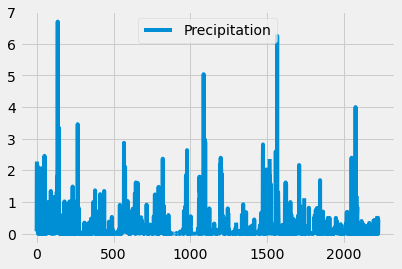

In [29]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.title = ("Precipitation from 2016-08-23")
plt.xlabel = ("Date")
plt.ylabel = ("Precipitation")
plt.legend = ("Precipitation")
prcpscores_df.plot()
plt.savefig('Images/Precipitation_Plot.png')

In [30]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcpscores_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [32]:
# Design a query to calculate the total number stations in the dataset

station_total = session.query(Station).count()
print(f"The total number of stations in this data set is: {station_total}")

The total number of stations in this data set is: 9


In [40]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.tobs)).\
group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

active_stations

active_stations_df = pd.DataFrame(active_stations,columns=['Station Id','Observation'])
active_stations_df
                     


             



,Station Id,Observation
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [42]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = session.query(Measurement.station,func.count(Measurement.tobs)).\
group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).\
limit(1).scalar()
active_station

sel = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
session.query(*sel).\
filter(Measurement.station == active_station).\
group_by(Measurement.station).\
all()


[(54.0, 85.0, 71.66378066378067)]

In [43]:
active_station

'USC00519281'

In [61]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tempobs = session.query(Measurement.station,Measurement.tobs).\
            filter(Measurement.station == 'USC00519281').\
            filter(Measurement.date >= last_12_mths ).all()


tobs_df = pd.DataFrame(tempobs)
tobs_df.head()


,0,1
0,USC00519281,77.0
1,USC00519281,80.0
2,USC00519281,80.0
3,USC00519281,75.0
4,USC00519281,73.0


<function matplotlib.pyplot.show(close=None, block=None)>

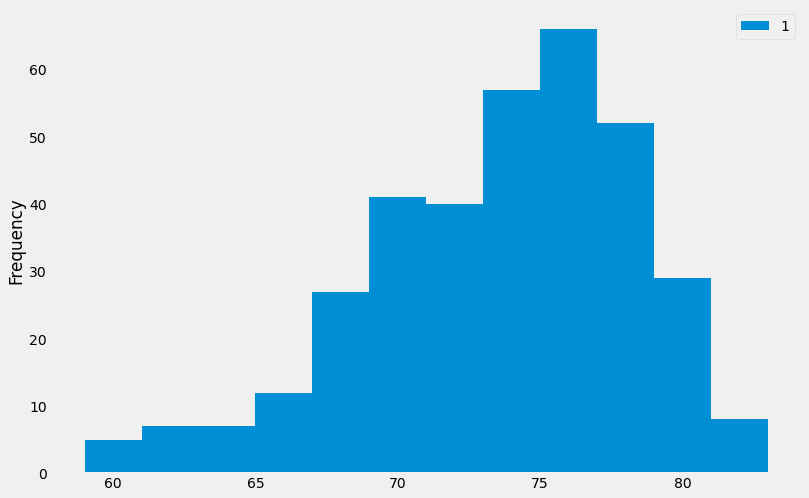

In [62]:
tobs_df.plot.hist(by='station',bins=12,figsize=(12,8))
plt.grid()
plt.savefig("../StationTemps.png")
plt.show

# Close session

In [63]:
# Close Session
session.close()